In [49]:
import gepard as g

# Import theory model KM15
from gepard.fits import th_KM15

# import numpy for convenience
import numpy as np

# import matplot
import matplotlib.pyplot as plt

print("Gepard version:", g.__version__)

Gepard version: 0.9.10


In [51]:
pt = g.DataPoint(
    xB=0.225446,       # Bjorken x
    t=-0.703121,         # momentum transfer
    Q2=2.95302,         # virtuality
    phi=187.5 * np.pi / 180,        # azimuthal angle
    process='ep2epgamma',    # DVCS process
    exptype='fixed target',  # for clarity in this example
    in1energy=10.6,           # beam energy, in GeV
    in1charge=-1,            # electron beam
    in1polarization=0,      # beam helicity, +1
    observable='XS',         # cross section
    val=0.00948445,                # measured value
    err=0.00147967                 # measurement uncertainty
)

# Access attributes:
print("xB =", pt.xB)
print("xi =", pt.xi)   

# "predict" will compute the observable named in pt.observable, which is "XS"
theory_prediction = th_KM15.predict(pt)
print("Theory prediction for cross-section:", theory_prediction)

xB = 0.225446
xi = 0.12704375296553388
Theory prediction for cross-section: 0.14931661685032213


phi = 22.5 deg => XS = -0.004585242092355593
phi = 60 deg => XS = -0.004368748061372644
phi = 90 deg => XS = -0.004110939338528248
phi = 120 deg => XS = -0.003850493257428287
phi = 142.5 deg => XS = -0.0036964602018961477
phi = 157.5 deg => XS = -0.0036276320803759116
phi = 172.5 deg => XS = -0.00359193342556753
phi = 187.5 deg => XS = -0.00359193342556753
phi = 202.5 deg => XS = -0.0036276320803759116
phi = 225 deg => XS = -0.0037418404940211224
phi = 247.5 deg => XS = -0.003911839346966489
phi = 262.5 deg => XS = -0.0040432036465663035
phi = 277.5 deg => XS = -0.004178495298883517
phi = 292.5 deg => XS = -0.0043084944013927345
phi = 307.5 deg => XS = -0.0044244781138577825
phi = 322.5 deg => XS = -0.0045187785615586175
phi = 337.5 deg => XS = -0.004585242092355593


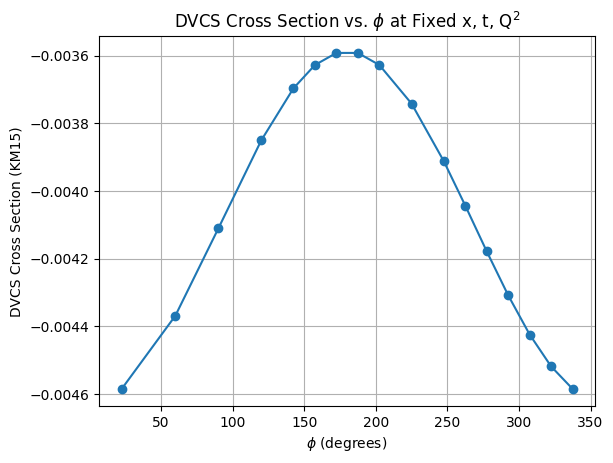

In [54]:
# Define the fixed kinematics
# xB_val = 0.225446
# t_val  = -0.703121
# Q2_val = 2.95302

xB_val = 0.372
t_val  = -0.336
Q2_val = 4.570

# Define the list of phi values (in degrees)
phi_deg_values = [
    22.5, 60, 90, 120, 142.5,
    157.5, 172.5, 187.5, 202.5,
    225, 247.5, 262.5, 277.5,
    292.5, 307.5, 322.5, 337.5
]

# Prepare a list to store the results
xs_values = []

for phi_deg in phi_deg_values:
    phi_rad = phi_deg * np.pi / 180.0  # Convert degrees to radians
    
    # Include process & exptype to avoid the "no attribute process" error
    pt = g.DataPoint(
        xB=xB_val,
        t=t_val,
        Q2=Q2_val,
        # phi=phi_rad,
        phi = np.pi - phi_rad,
        observable='XS',
        frame = 'trento',
        process='ep2epgamma',     # MUST specify so the DVCS code knows the reaction
        exptype='fixed target',    # Type of experiment (e.g., fixed target vs. collider)
        in1energy=10.6,           # beam energy, in GeV
        in1charge=-1,            # electron beam
        in1polarization=0     # beam helicity, +1
    )
    
    # Predict the cross section at this phi
    pt.prepare()
    xs_pred = th_KM15.PreFacSigma(pt)*pt.P1P2*th_KM15.TBH2unp(pt)
    # xs_pred = th_KM15.PreFacSigma(pt)*(th_KM15.TBH2unp(pt)+th_KM15.TINTunp(pt)+th_KM15.TDVCS2unp(pt))
    xs_values.append(xs_pred)
#endfor

# Print out the results in a table-like format
for deg, val in zip(phi_deg_values, xs_values):
    print(f"phi = {deg} deg => XS = {val}")

# Plot
plt.plot(phi_deg_values, xs_values, marker='o')
plt.xlabel(r'$\phi$ (degrees)')
plt.ylabel('DVCS Cross Section (KM15)')
plt.title(r'DVCS Cross Section vs. $\phi$ at Fixed x, t, Q$^2$')  # raw string to avoid warnings
plt.grid(True)
plt.show()
#endfor